In [20]:
import matplotlib.pyplot as plt
import numpy as np 
import os 
plt.rcParams['figure.figsize'] = [17,8]

In [35]:
# LOAD DATASET
path = r"C:\Users\Eduardo\Documents\CARRERA\University_of_washington\data_sets"
obs = np.loadtxt(os.path.join(path,'ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join(path,'ovariancancer_grp.csv'), "r") 
grp = f.read().split("\n") #matrik with Cancer if cancer, Noraml if patient has no cancer

In [36]:
#Getting to know the data
print("Shape obs: " ,obs.shape)
print(" 216 patients, 4000 genetic markers for each patient")
print(" first 108 have ovarian cancer, 108 rest don't")


Shape obs:  (216, 4000)
 216 patients, 4000 genetic markers for each patient
 first 108 have ovarian cancer, 108 rest don't


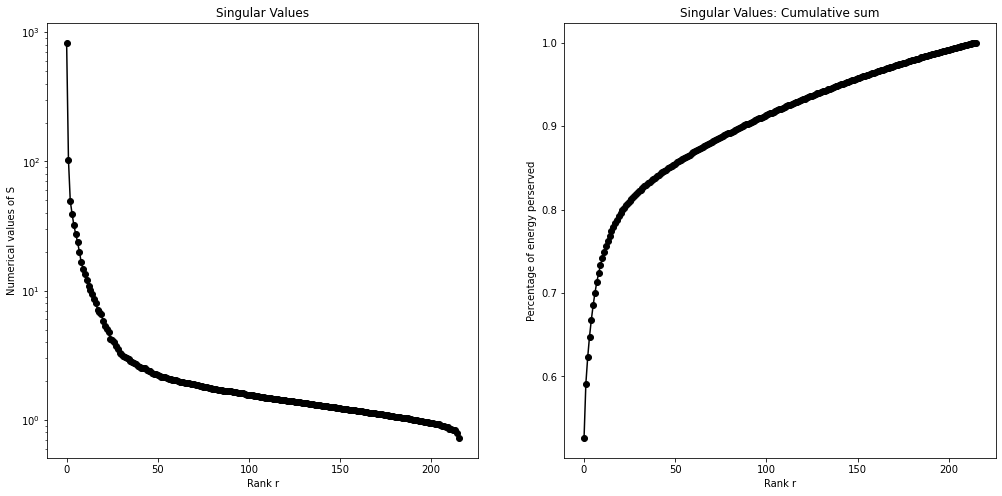

In [25]:
#SVD Analysis
U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax1.set_title('Singular Values')
ax1.set_xlabel('Rank r')
ax1.set_ylabel('Numerical values of S')

ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
ax2.set_title('Singular Values: Cumulative sum')
ax2.set_xlabel('Rank r')
ax2.set_ylabel('Percentage of energy perserved')

plt.show()

### understanding our decompostion:

In [42]:
print("Shapes: obs: " ,obs.shape," U:",U.shape," S:",np.diag(S).shape," VT:",VT.shape)

Shapes: obs:  (216, 4000)  U: (216, 216)  S: (216, 216)  VT: (216, 4000)


We see that the 3 Singular values capture aboute 67 % percent of the energy. we are going to proyect the data with VT to reduce the data to 3 Dimesnions in order to visualize

We cand do the proyection either way VTX.T or XVT.T

In [48]:
VT_1=VT[0,:].reshape(1,-1)
VT_2=VT[1,:].reshape(1,-1)
VT_3=VT[2,:].reshape(1,-1)

VT_1.shape

(1, 4000)

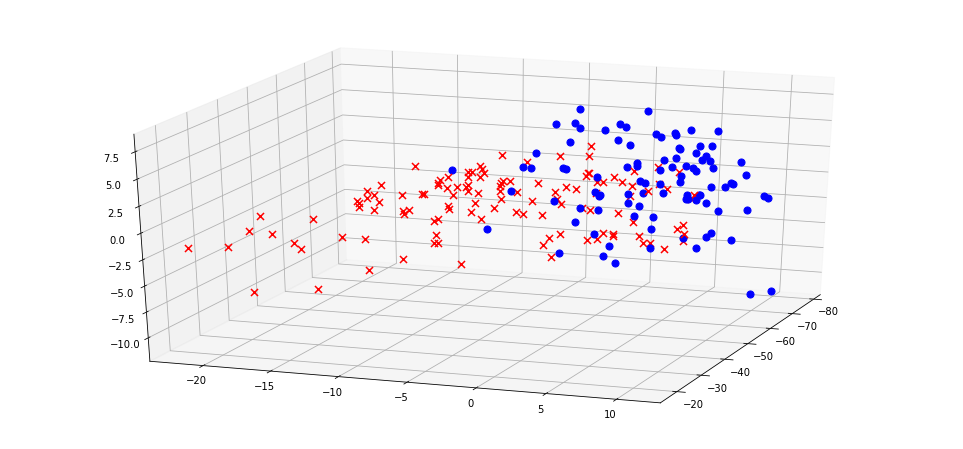

In [49]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT_1 @ obs[j,:].T
    y = VT_2 @ obs[j,:].T
    z = VT_3 @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()


Same proyection

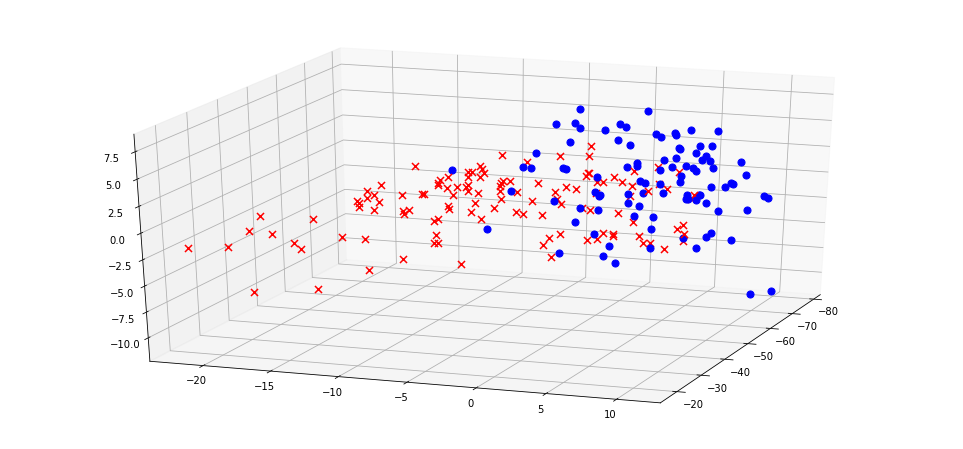

In [50]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = obs[j,:] @  VT_1.T  
    y = obs[j,:] @  VT_2.T
    z = obs[j,:] @  VT_3.T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()

From this we can visualy cluster or data from cancer and non cancer

Bibliography <br> [
Steve Brunton, University of Washingon](https://www.youtube.com/watch?v=fu7uXxZMzC8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=25)